Data Analysis Personal Project | Respiratory Disease Detection
--- | ---
<hr> | <hr>
**Name** | de Leon, Bryan Paul <br>
**Date** | May 28, 2024


# PART 1: The Dataset

**About the Project**
- A personal project wherein I developed and trained a Convolution Neural Network for the purpose of being able to insert images through Streamlit, the model will then determine if the X-ray image inserted into the app displays sign of a Respiratory Condition.

**Dataset Source**
- [Respiratory Image Dataset](https://www.kaggle.com/datasets/fatemehmehrparvar/lung-disease)

In [1]:
#importing necessary libraries

from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Input, Activation
from keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os

In [2]:
#mounting the dataset into colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#navigating to the dataset

data_directory_train = ('//content/drive/MyDrive/DATASET/RESPIRATORY')
filepaths = []
labels = []
folds = os.listdir(data_directory_train)

for fold in folds:
  fold_path = os.path.join(data_directory_train, fold)
  filelists = os.listdir(fold_path)

  for file in filelists:
    file_path = os.path.join(fold_path, file)

    filepaths.append(file_path)
    labels.append(fold)

In [4]:
#storing the images into a dataframe for training data

Fdata_train = pd.Series(filepaths, name = 'filename')
Ldata_train = pd.Series(labels, name = 'label')

respiratoryFrame = pd.concat([Fdata_train, Ldata_train], axis = 1)


In [5]:
#verfying changes for training set

respiratoryFrame.head()

,filename,label
0,//content/drive/MyDrive/DATASET/RESPIRATORY/Vi...,Viral Pneumonia
1,//content/drive/MyDrive/DATASET/RESPIRATORY/Vi...,Viral Pneumonia
2,//content/drive/MyDrive/DATASET/RESPIRATORY/Vi...,Viral Pneumonia
3,//content/drive/MyDrive/DATASET/RESPIRATORY/Vi...,Viral Pneumonia
4,//content/drive/MyDrive/DATASET/RESPIRATORY/Vi...,Viral Pneumonia


In [6]:
respiratoryFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2350 non-null   object
 1   label     2350 non-null   object
dtypes: object(2)
memory usage: 36.8+ KB


# PART 2: Data Processing

In [7]:
#importing necessary libraries

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


In [8]:
#splitting the data into training and testing

train_data, dummy_data = train_test_split(respiratoryFrame, train_size = 0.4, shuffle = True, random_state = 42,
                                          stratify = respiratoryFrame['label'] )

valid_data, test_data = train_test_split(dummy_data, train_size = 0.4, shuffle = True, random_state = 42,
                                         stratify = dummy_data['label'])

In [9]:
#performing image augmentation

datagen = ImageDataGenerator(

    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,

)

In [10]:
#applying image augmentation into the datasets

train_generator = datagen.flow_from_dataframe(
    dataframe = train_data,
    x_col='filename',
    y_col='label',
    featurewise_center=True,
    zca_whitening = True,
    target_size=(150,150),
    batch_size=128,
    class_mode='categorical'
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_data,
    x_col='filename',
    y_col='label',
    target_size=(150,150),
    batch_size=128,
    class_mode='categorical'
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='filename',
    y_col='label',
    target_size=(150,150),
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

Found 940 validated image filenames belonging to 2 classes.
Found 564 validated image filenames belonging to 2 classes.
Found 846 validated image filenames belonging to 2 classes.


# PART 3: Creating the CNN Model

In [11]:
#importing necessary libraries

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD, Adam

In [13]:
#defining the CNN Model

model = Sequential([
    Conv2D(256, (2, 2), activation='relu', kernel_initializer='he_uniform', input_shape=(150,150,3)),
    MaxPooling2D((3, 3)),
    Conv2D(128, (2, 2), activation='relu', kernel_initializer='he_uniform'),
    MaxPooling2D((3, 3)),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid') # 2 output layer for 2 categories
])

In [14]:
#compiling the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#fitting the model

hist = model.fit(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 15,
    validation_data = valid_generator,
    validation_steps = len(valid_generator)
)

Epoch 1/15
8/8 [==============================] - 161s 20s/step - loss: 1.3164 - accuracy: 0.5053 - val_loss: 0.6595 - val_accuracy: 0.5319
Epoch 2/15
8/8 [==============================] - 160s 20s/step - loss: 0.5616 - accuracy: 0.7000 - val_loss: 0.3881 - val_accuracy: 0.8475
Epoch 3/15
8/8 [==============================] - 140s 18s/step - loss: 0.3577 - accuracy: 0.8457 - val_loss: 0.3509 - val_accuracy: 0.8528
Epoch 4/15
8/8 [==============================] - 159s 19s/step - loss: 0.3072 - accuracy: 0.8723 - val_loss: 0.3275 - val_accuracy: 0.8635
Epoch 5/15
8/8 [==============================] - 159s 22s/step - loss: 0.2787 - accuracy: 0.8872 - val_loss: 0.2896 - val_accuracy: 0.8830
Epoch 6/15
8/8 [==============================] - 143s 18s/step - loss: 0.2455 - accuracy: 0.9011 - val_loss: 0.2908 - val_accuracy: 0.8830
Epoch 7/15
8/8 [==============================] - 142s 19s/step - loss: 0.2359 - accuracy: 0.9032 - val_loss: 0.2490 - val_accuracy: 0.8972
Epoch 8/15
8/8 [====

In [15]:
#evaluate the performance of the model

model.evaluate(test_generator)

7/7 [==============================] - 37s 5s/step - loss: 0.1961 - accuracy: 0.9255


[0.196145698428154, 0.9255319237709045]

In [16]:
model.evaluate(valid_generator)

5/5 [==============================] - 24s 4s/step - loss: 0.2056 - accuracy: 0.9255


[0.20561489462852478, 0.9255319237709045]

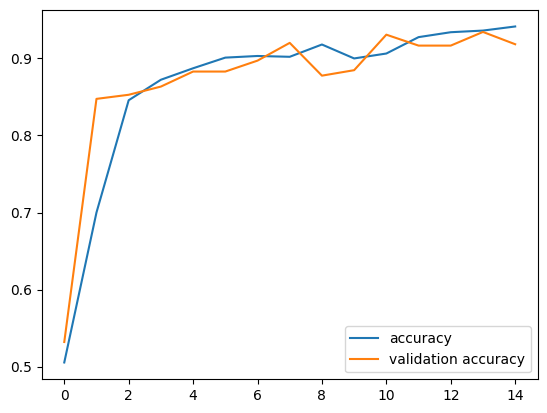

In [17]:
#plotting the training and testing

hist.history.keys()

plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')

plt.legend()
plt.show()

# PART 4: Saving Model

In [18]:
#importing libraries

!pip install h5py
from keras.models import load_model, save_model

#saving the model that we made into hdf5 format

model.save('respiratory_trained.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# PART 5: Model Deployment



In [ ]:
!pip install streamlit

In [ ]:
#creating the app py

%%writefile app.py

import streamlit as st
import tensorflow as tf
import numpy as np

@st.cache_resource
def load_model():
  model=tf.keras.models.load_model('respiratory_trained')
  return model
model=load_model()
st.write("""
# Respiratory Disease Detection"""
)
file=st.file_uploader("Insert Chest X-ray",type=["jpg","png"])

import cv2
from PIL import Image,ImageOps
import numpy as np
def import_and_predict(image_data,model):
    size=(150,150)
    image=ImageOps.fit(image_data,size, Image.Resampling.LANCZOS)
    img=np.asarray(image)
    img_reshape=img[np.newaxis,...]
    prediction=model.predict(img_reshape)
    return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image=Image.open(file)
    st.image(image,use_column_width=True)
    prediction=import_and_predict(image,model)
    class_names=['Normal', 'Viral Pneumonia']
    string="OUTPUT : "+class_names[np.argmax(prediction)]
    st.success(string)